<a href="https://colab.research.google.com/github/soumya0422/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices-/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from prophet import Prophet


In [ ]:
from google.colab import files
df = files.upload()

Saving processed_data.csv to processed_data.csv


In [15]:
features=pd.read_csv('/content/drive/MyDrive/FitPulse Health Anomaly Detection/Milestone2/data/extracted_features.csv')
print("Features loaded")
display(features.head())


Features loaded


,StepTotal__has_duplicate_min,StepTotal__has_duplicate,StepTotal__sum_values,StepTotal__abs_energy,StepTotal__mean_abs_change,StepTotal__mean_change,StepTotal__mean_second_derivative_central,StepTotal__median,StepTotal__mean,StepTotal__length,...,sleep_hours__fourier_entropy__bins_2,sleep_hours__fourier_entropy__bins_3,sleep_hours__fourier_entropy__bins_5,sleep_hours__fourier_entropy__bins_10,sleep_hours__fourier_entropy__bins_100,sleep_hours__permutation_entropy__dimension_4__tau_1,sleep_hours__permutation_entropy__dimension_5__tau_1,sleep_hours__permutation_entropy__dimension_6__tau_1,sleep_hours__permutation_entropy__dimension_7__tau_1,sleep_hours__mean_n_absolute_max__number_of_maxima_7
0,1.0,1.0,351707.0,713319705.0,850.917706,-0.453865,-0.256250,581.5,874.893035,402.0,...,0.045395,0.090729,0.090729,0.090729,0.090729,-0.000000,-0.000000,-0.000000,-0.000000,7.050000
1,0.0,0.0,8483.0,10265701.0,574.666667,59.833333,-1.363636,484.0,652.538462,13.0,...,0.598270,0.598270,0.598270,1.078992,1.945910,-0.000000,-0.000000,-0.000000,-0.000000,8.707143
2,1.0,1.0,171337.0,302744645.0,483.512887,-1.023196,-1.031008,152.0,440.455013,389.0,...,0.079983,0.159721,0.204871,0.271451,0.656386,0.330351,0.440204,0.549890,0.659385,9.266667
3,1.0,1.0,68337.0,56920503.0,240.877193,0.000000,-0.566079,167.0,298.414847,229.0,...,0.120865,0.208106,0.269691,0.462757,1.295978,0.365404,0.487360,0.609337,0.743417,8.350000
4,1.0,1.0,329368.0,512207524.0,464.794603,0.000000,-0.234985,251.5,493.065868,668.0,...,0.138228,0.183378,0.280179,0.374092,0.936173,0.269990,0.359734,0.449338,0.538792,10.316667


In [16]:
features

,StepTotal__has_duplicate_min,StepTotal__has_duplicate,StepTotal__sum_values,StepTotal__abs_energy,StepTotal__mean_abs_change,StepTotal__mean_change,StepTotal__mean_second_derivative_central,StepTotal__median,StepTotal__mean,StepTotal__length,...,sleep_hours__fourier_entropy__bins_2,sleep_hours__fourier_entropy__bins_3,sleep_hours__fourier_entropy__bins_5,sleep_hours__fourier_entropy__bins_10,sleep_hours__fourier_entropy__bins_100,sleep_hours__permutation_entropy__dimension_4__tau_1,sleep_hours__permutation_entropy__dimension_5__tau_1,sleep_hours__permutation_entropy__dimension_6__tau_1,sleep_hours__permutation_entropy__dimension_7__tau_1,sleep_hours__mean_n_absolute_max__number_of_maxima_7
0,1.0,1.0,351707.0,7.133197e+08,850.917706,-0.453865,-0.256250,581.5,874.893035,402.0,...,0.045395,0.090729,0.090729,0.090729,0.090729,-0.000000,-0.000000,-0.000000,-0.000000,7.050000
1,0.0,0.0,8483.0,1.026570e+07,574.666667,59.833333,-1.363636,484.0,652.538462,13.0,...,0.598270,0.598270,0.598270,1.078992,1.945910,-0.000000,-0.000000,-0.000000,-0.000000,8.707143
2,1.0,1.0,171337.0,3.027446e+08,483.512887,-1.023196,-1.031008,152.0,440.455013,389.0,...,0.079983,0.159721,0.204871,0.271451,0.656386,0.330351,0.440204,0.549890,0.659385,9.266667
3,1.0,1.0,68337.0,5.692050e+07,240.877193,0.000000,-0.566079,167.0,298.414847,229.0,...,0.120865,0.208106,0.269691,0.462757,1.295978,0.365404,0.487360,0.609337,0.743417,8.350000
4,1.0,1.0,329368.0,5.122075e+08,464.794603,0.000000,-0.234985,251.5,493.065868,668.0,...,0.138228,0.183378,0.280179,0.374092,0.936173,0.269990,0.359734,0.449338,0.538792,10.316667
5,1.0,1.0,237909.0,2.966530e+08,409.382353,-0.296078,-0.543222,309.0,465.575342,511.0,...,0.079983,0.190068,0.269433,0.363346,0.904268,0.137770,0.183866,0.230048,0.276314,2.850000
6,1.0,1.0,266187.0,4.274594e+08,414.835735,-0.002882,-1.953824,96.0,383.002878,695.0,...,0.110453,0.155665,0.220352,0.314393,0.915160,0.344072,0.457994,0.571494,0.684548,12.916667
7,1.0,1.0,243598.0,3.507065e+08,439.993367,0.000000,-1.059801,144.5,403.307947,604.0,...,0.110453,0.155665,0.204871,0.335886,0.719496,0.336188,0.445610,0.554709,0.663463,10.050000
8,1.0,1.0,174244.0,1.522880e+08,223.637413,-2.773672,-1.887731,272.5,401.483871,434.0,...,0.079983,0.159721,0.245901,0.325140,0.977194,0.354418,0.472016,0.589299,0.706235,10.966667
9,1.0,1.0,65362.0,9.314426e+07,427.682432,-0.993243,0.459184,88.0,438.671141,149.0,...,0.070811,0.141441,0.141441,0.141441,0.498868,0.122738,0.164491,0.206675,0.249296,7.050000


In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [18]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_scaled)
features['kmeans_cluster'] = kmeans_clusters

# DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_clusters = dbscan.fit_predict(X_scaled)
features['dbscan_cluster'] = dbscan_clusters

print("Clustering completed")


Clustering completed


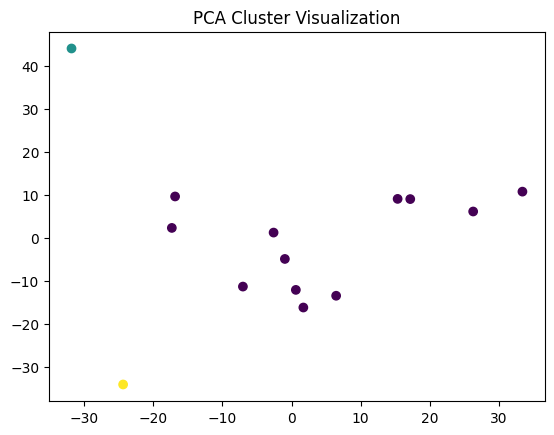

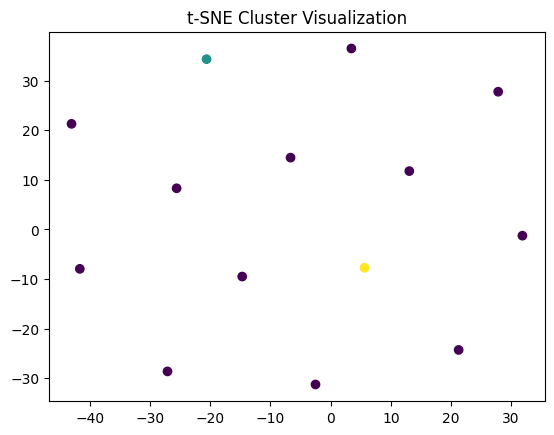

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


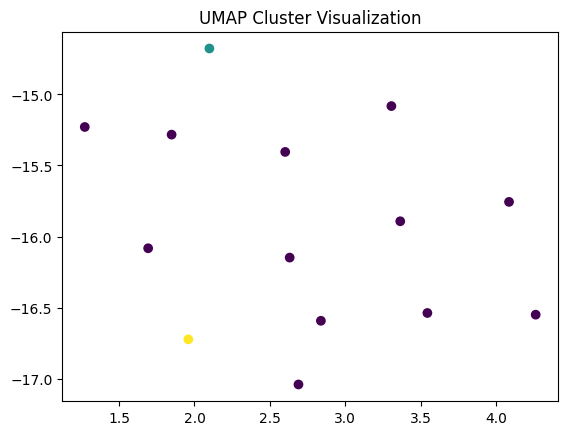

In [19]:
# PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_clusters, cmap='viridis')
plt.title("PCA Cluster Visualization")
plt.show()

# t-SNE
perplexity_val = min(30, X_scaled.shape[0]-1)
X_tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_val).fit_transform(X_scaled)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans_clusters, cmap='viridis')
plt.title("t-SNE Cluster Visualization")
plt.show()

# UMAP
n_neighbors_val = min(15, X_scaled.shape[0]-1)
X_umap = umap.UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors_val).fit_transform(X_scaled)
plt.scatter(X_umap[:,0], X_umap[:,1], c=kmeans_clusters, cmap='viridis')
plt.title("UMAP Cluster Visualization")
plt.show()


In [20]:
import pandas as pd
from prophet import Prophet

# Ensure 'Time' column in the existing df is timezone-naive
df["Time"] = pd.to_datetime(df["Time"]).dt.tz_localize(None)

# Group by 'Time' and aggregate heart_rate
prophet_df = df.groupby("Time", as_index=False).agg(y=("heart_rate","mean")).rename(columns={"Time":"ds"})

# Prophet model setup and fitting
model = Prophet(daily_seasonality=True, weekly_seasonality=True)
model.fit(prophet_df)

# Make future dataframe (periods=0 means forecasting for the existing historical data points)
future = model.make_future_dataframe(periods=0, freq='h')
forecast = model.predict(future)

# Merge actuals with forecast to identify anomalies
trend_df = prophet_df.merge(forecast[['ds','yhat','yhat_lower','yhat_upper']], on='ds')
trend_df['residual'] = trend_df['y'] - trend_df['yhat']
trend_df['anomaly'] = ((trend_df['y'] > trend_df['yhat_upper']) | (trend_df['y'] < trend_df['yhat_lower'])).astype(int)

print(f"Detected anomalies: {trend_df['anomaly'].sum()}")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Detected anomalies: 139


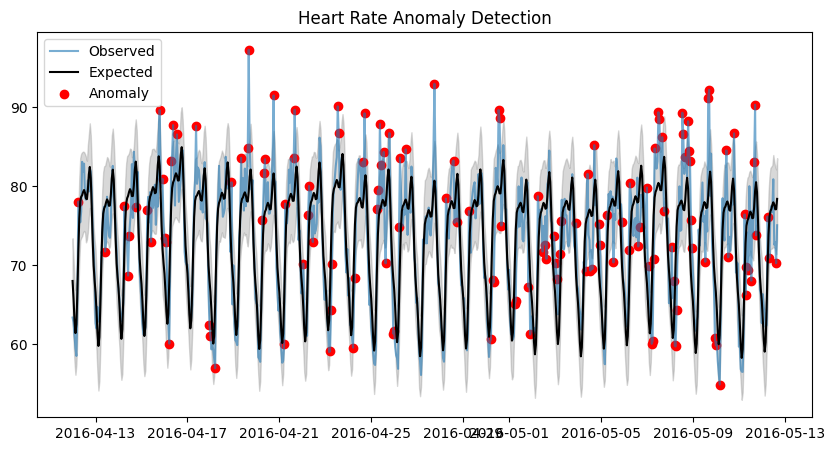

In [21]:
plt.figure(figsize=(10,5))
plt.plot(trend_df['ds'], trend_df['y'], label='Observed', alpha=0.6)
plt.plot(trend_df['ds'], trend_df['yhat'], label='Expected', color='black')
plt.fill_between(trend_df['ds'], trend_df['yhat_lower'], trend_df['yhat_upper'], color='gray', alpha=0.3)
plt.scatter(trend_df.loc[trend_df['anomaly']==1,'ds'], trend_df.loc[trend_df['anomaly']==1,'y'], color='red', label='Anomaly')
plt.legend()
plt.title("Heart Rate Anomaly Detection")
plt.show()
